<img src="C:/Users/james/Downloads/Curso de python Udemy/img/fondo.jpg">


# Hola como estas! 
<h1> klk tu dice<h1>


## Colors from data csv

In [16]:
import dataframes as dt
import pandas as pd
#print(dt.colores['name'])
dt.colores['name'].nunique()
#dt.colores.nunique()

135

## Transparent compared to opaque

In [17]:
dt.colores.groupby(dt.colores['is_trans']).count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### Understanding LEGO Themes Vs. LEGO Sets
<blockquote> walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman,Harry Potter and many more.
</blockquote>
<img src ="" >

<blockquote> A lego <b>set</b> is a particular box of LEGO or product. Therefore, a single theme typically has many different sets. </blockquote>
<img src="">

<blockquote> 
1. In which year were the first LEGO sets released and what were these sets called?

2.How many different products did the LEGO company sell in their first year of operation?

3.What are the top 5 LEGO sets with the most number of parts? 
</blockquote>

In [27]:
import dataframes as dt
#dt.sets.head()
#dt.sets[['year','name']].min()
#first LEGO sets released and what were these called
dt.sets.sort_values('year').head()


,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [28]:
dt.sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [29]:
#Top 5 lego sets with most number of parts
dt.sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [30]:
#if you want to see with the less number of part??, then use tail()
dt.sets.sort_values('num_parts', ascending=False).tail()

,set_num,name,year,theme_id,num_parts
15669,tsuper-1,Technic Super Set,1991,12,0
11,005-2,Discovery Set,1967,366,0
15700,WEETABIX5-1,Weetabix Promotional Lego Village,1976,413,0
15693,W991526-1,Homeschool Introduction to Simple and Motorize...,2009,529,0
15692,W098-1,Classic Blue Link Watch,2006,501,0


## Visualise the number of sets published over time

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
sets_by_year =dt.sets.groupby('year').count()
sets_by_year.head()
#sets_by_year['set_num'].head()
#sets_by_year['set_num'].tail()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


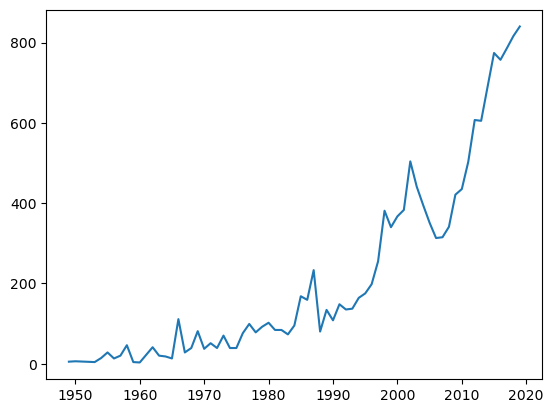

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
sets_by_year =dt.sets.groupby('year').count()
sets_by_year.head()

#------------------------------------------------------------------------------
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
# esto desfasa 2 intervalos hacia atras para evitar que se vicee el grafico por valores = -0


In [57]:
themes_by_year =dt.sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace= True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


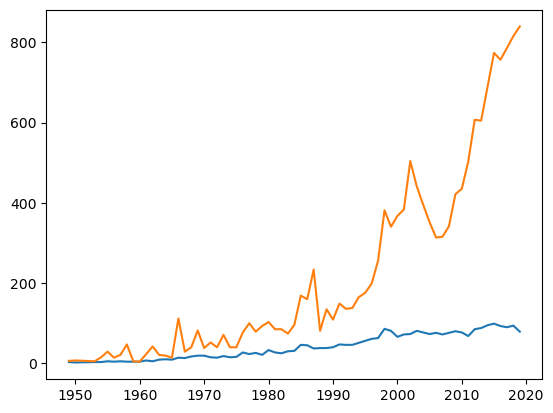

In [61]:

plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])


Text(0, 0.5, 'Number of Themes')

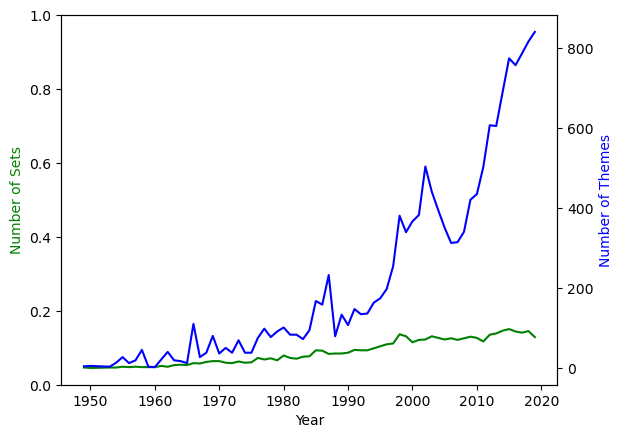

In [66]:
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color ='green')
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color = 'blue')
#los ejes no encajaban bien en el grafico anterior porque las escalaas eran diferente
#se crea un objeto eje .gca() coje el eje actual 
# el twinx() crea otro eje que comparte el mismo eje x anterior

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color ='green')
ax2.set_ylabel('Number of Themes', color ='blue')

In [72]:
import pandas as pd
import dataframes as df
parts_per_set = df.sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set.head()


,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


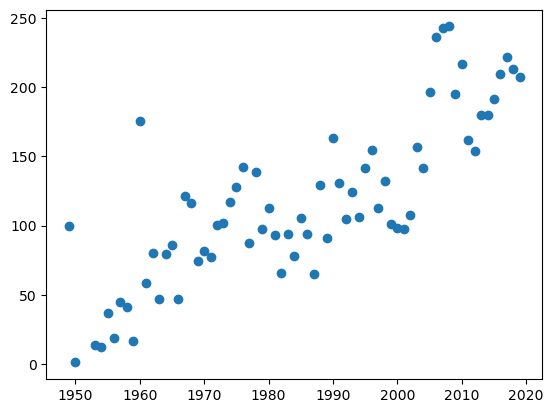

In [74]:
plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])

In [5]:
import pandas as pd
import dataframes as df
set_theme_count= df.sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [7]:
set_theme_count= df.sets.groupby('theme_id').count()
print(set_theme_count)

          set_num  name  year  num_parts
theme_id                                
1             167   167   167        167
2               4     4     4          4
3              18    18    18         18
4              39    39    39         39
5              12    12    12         12
...           ...   ...   ...        ...
705             8     8     8          8
706            52    52    52         52
707             2     2     2          2
708            43    43    43         43
709             4     4     4          4

[571 rows x 4 columns]


### Relational database

<img src="https://i.imgur.com/Sg4lcjx.png"></img>

### Star Wars Themes


In [19]:
import pandas as pd
import dataframes as df
df.themes[df.themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [24]:
import dataframes as df
df.sets[df.sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [1]:
import dataframes as df
set_theme_count = df.sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [7]:
import dataframes as df
import pandas as pd
set_theme_count = df.sets['theme_id'].value_counts()
set_theme_count =pd.DataFrame({'id':set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()



,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


<BarContainer object of 10 artists>

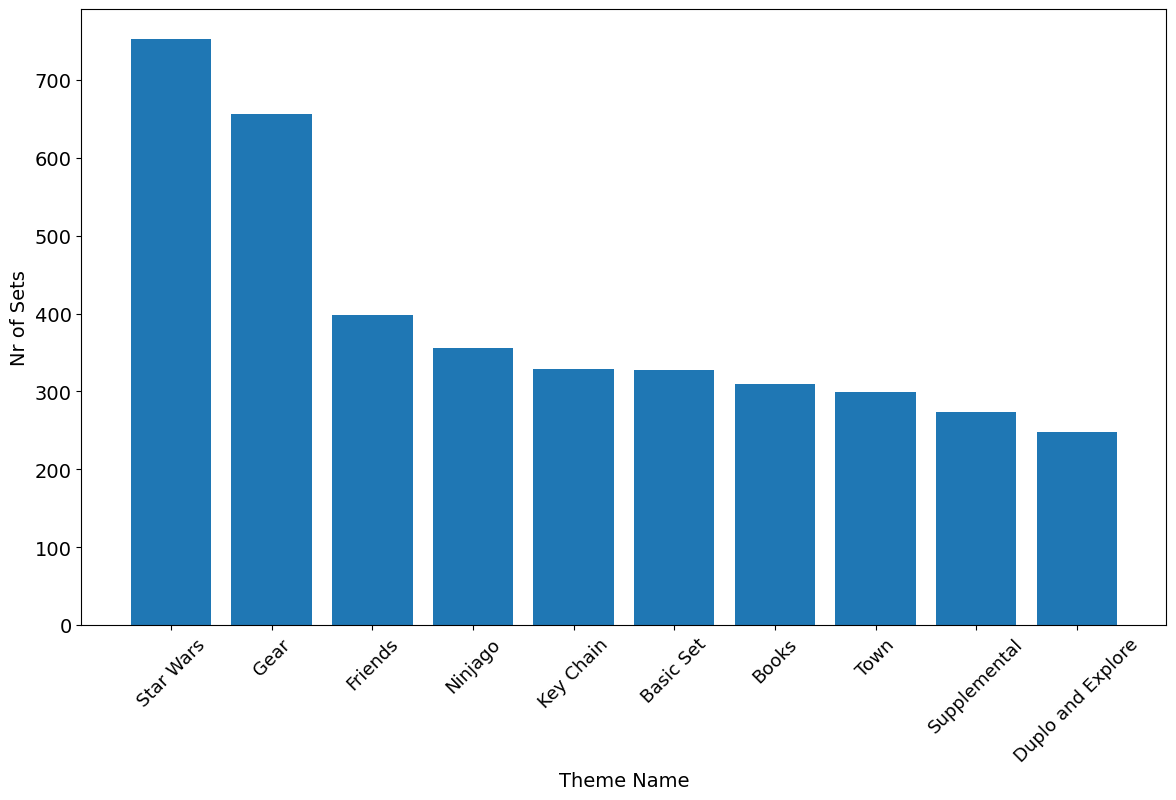

In [26]:
import dataframes as df
import pandas as pd
import matplotlib.pyplot as plt   # <-- Falta esto

set_theme_count = df.sets['theme_id'].value_counts()
set_theme_count =pd.DataFrame({'id':set_theme_count.index, 'set_count': set_theme_count.values})

merged_df = pd.merge(set_theme_count,df.themes,on='id')

#merged_df.head()
plt.figure(figsize = (14,8))
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize = 14)
plt.ylabel('Nr of Sets',fontsize =14)
plt.xlabel('Theme Name',fontsize =14)
plt.bar( merged_df.name[:10], merged_df.set_count[:10])